This code takes in raw collected mp3 recordings and phrases.json file to generate audio segments with matching transcripts.

# Original

In [ ]:
!unzip recordings.zip -d recordings

Archive:  recordings.zip
   creating: recordings/recordings/
  inflating: recordings/recordings/.DS_Store  
  inflating: recordings/__MACOSX/recordings/._.DS_Store  
   creating: recordings/recordings/recordings_Habib/
  inflating: recordings/__MACOSX/recordings/._recordings_Habib  
   creating: recordings/recordings/recordings_Alex/
  inflating: recordings/__MACOSX/recordings/._recordings_Alex  
   creating: recordings/recordings/recordings_Vivian/
  inflating: recordings/__MACOSX/recordings/._recordings_Vivian  
  inflating: recordings/recordings/recordings_Habib/audio3.mp3  
  inflating: recordings/__MACOSX/recordings/recordings_Habib/._audio3.mp3  
  inflating: recordings/recordings/recordings_Habib/audio13.mp3  
  inflating: recordings/__MACOSX/recordings/recordings_Habib/._audio13.mp3  
  inflating: recordings/recordings/recordings_Habib/audio12.mp3  
  inflating: recordings/__MACOSX/recordings/recordings_Habib/._audio12.mp3  
  inflating: recordings/recordings/recordings_Habib/a

In [ ]:
!rm -rf /content/recordings/__MACOSX # if required

In [ ]:
!pip install pydub
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
import os
import json
import shutil
import subprocess

# Define paths
source_dir = "/content/recordings"  # Source folder containing the original audio files
target_dir = "/content/collected_data"  # Target folder where formatted data will be stored
json_file = "/content/phrases.json"  # JSON file with transcripts
transcript_file_path = os.path.join(target_dir, "transcripts.txt")  # Single transcript file for Azure

# Load JSON data
with open(json_file, "r", encoding="utf-8") as f:
    transcript_data = json.load(f)

# Convert list to dictionary for faster lookups
transcript_dict = {item["file_name"]: item["transcript"] for item in transcript_data}

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# Open transcript file
with open(transcript_file_path, "w", encoding="utf-8") as transcript_file:
    # Walk through the source directory
    for root, _, files in os.walk(source_dir):
        base_folder = os.path.basename(root)  # Get the subfolder name (e.g., "recordings_Alex")

        for file in files:
            if file.endswith((".wav", ".mp3", ".flac")):  # Process only audio files
                source_file_path = os.path.join(root, file)

                # Determine the correct new filename format
                base_name = os.path.splitext(file)[0]  # Remove extension
                new_file_name = f"{base_folder}_{base_name}.wav"  # Ensure all are saved as WAV
                target_file_path = os.path.join(target_dir, new_file_name)

                # Convert MP3/FLAC to WAV if needed
                if file.endswith(".mp3") or file.endswith(".flac"):
                    ffmpeg_command = [
                        "ffmpeg", "-y",  # Overwrite existing files
                        "-i", source_file_path,  # Input file
                        "-acodec", "pcm_s16le",  # PCM encoding
                        "-ar", "16000",  # Set sample rate to 16 kHz
                        "-ac", "1",      # Set to mono channel
                        target_file_path  # Output file (preserves renamed filename)
                    ]
                    result = subprocess.run(ffmpeg_command, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

                    # Check if conversion was successful
                    if result.returncode == 0:
                        print(f"Converted: {file} → {target_file_path}")
                    else:
                        print(f"Error converting {file}")
                        continue  # Skip transcript writing if conversion failed
                else:
                    # Directly copy WAV files without conversion
                    if source_file_path != target_file_path:
                        shutil.copy(source_file_path, target_file_path)

                # Ensure the transcript matches the new filename
                original_filename = f"{base_name}.{file.split('.')[-1]}"  # Restore original extension
                transcript = transcript_dict.get(original_filename, "No transcript available")

                # Write to the single transcript file in Azure format
                transcript_file.write(f"{new_file_name}\t{transcript}\n")

print("Audio processing and transcript generation completed!")

Converted: audio12.mp3 → /content/collected_data/recordings_Habib_audio12.wav
Converted: audio6.mp3 → /content/collected_data/recordings_Habib_audio6.wav
Converted: audio15.mp3 → /content/collected_data/recordings_Habib_audio15.wav
Converted: audio17.mp3 → /content/collected_data/recordings_Habib_audio17.wav
Converted: audio14.mp3 → /content/collected_data/recordings_Habib_audio14.wav
Converted: audio7.mp3 → /content/collected_data/recordings_Habib_audio7.wav
Converted: audio10.mp3 → /content/collected_data/recordings_Habib_audio10.wav
Converted: audio3.mp3 → /content/collected_data/recordings_Habib_audio3.wav
Converted: audio26.mp3 → /content/collected_data/recordings_Habib_audio26.wav
Converted: audio8.mp3 → /content/collected_data/recordings_Habib_audio8.wav
Converted: audio24.mp3 → /content/collected_data/recordings_Habib_audio24.wav
Converted: audio23.mp3 → /content/collected_data/recordings_Habib_audio23.wav
Converted: audio16.mp3 → /content/collected_data/recordings_Habib_audio1

In [ ]:
# Play the audio for verification
from IPython.display import Audio, display

# Load transcripts into a dictionary
transcript_dict = {}
with open(transcript_file_path, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t", 1)  # Split at the first tab character
        if len(parts) == 2:
            transcript_dict[parts[0]] = parts[1]  # {filename: transcript}

# Display each audio file with corresponding transcript
for file in sorted(os.listdir(target_dir)):  # Sort files for better order
    if file.endswith(".wav"):  # Display only WAV files
        audio_path = os.path.join(target_dir, file)

        # Fetch transcript from the dictionary
        transcript = transcript_dict.get(file, "No transcript available")

        # Display filename, transcript, and audio player
        print(f"File Name: {file}")
        print(f"Transcript: {transcript}\n")
        display(Audio(audio_path))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!zip -r /content/collected_data.zip /content/collected_data

  adding: content/collected_data/ (stored 0%)
  adding: content/collected_data/recordings_Alex_audio39.wav (deflated 49%)
  adding: content/collected_data/recordings_Habib_audio26.wav (deflated 22%)
  adding: content/collected_data/recordings_Habib_audio10.wav (deflated 26%)
  adding: content/collected_data/recordings_Alex_audio7.wav (deflated 44%)
  adding: content/collected_data/transcripts.txt (deflated 78%)
  adding: content/collected_data/recordings_Alex_audio55.wav (deflated 41%)
  adding: content/collected_data/recordings_Habib_audio5.wav (deflated 22%)
  adding: content/collected_data/recordings_Vivian_audio13.wav (deflated 27%)
  adding: content/collected_data/recordings_Habib_audio1.wav (deflated 35%)
  adding: content/collected_data/recordings_Alex_audio54.wav (deflated 46%)
  adding: content/collected_data/recordings_Alex_audio35.wav (deflated 31%)
  adding: content/collected_data/recordings_Alex_audio58.wav (deflated 50%)
  adding: content/collected_data/recordings_Alex_au

In [ ]:
from google.colab import files
files.download("/content/collected_data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Augmentation

In [ ]:
# Upon inspection, the collected data only generated 8min of training data although we had over 200 phrases recorded.
# Thus, robust audio augmentations will be applied to upsample more training data while noting the possible overfitting.

In [ ]:
!pip install torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Get background noises
import urllib.request

# URL of the dataset
dataset_url = "http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz"
destination_path = "/content/speech_commands.tar.gz"

# Download with urllib (avoiding system-level wget issues)
print("Downloading dataset...")
urllib.request.urlretrieve(dataset_url, destination_path)
print("✅ Download complete!")

✅ Download complete!


In [ ]:
import tarfile

# Extract the _background_noise_ folder
tar_path = "/content/speech_commands.tar.gz"
extract_path = "/content/noise"

print("Extracting background noise...")
with tarfile.open(tar_path, "r:gz") as tar:
    for member in tar.getmembers():
        if "_background_noise_" in member.name:
            tar.extract(member, path=extract_path)
print("✅ Extraction complete!")

Extracting background noise...
✅ Extraction complete!


In [ ]:
# List extracted noise files
noise_dir = "/content/noise/_background_noise_"
noise_files = [f for f in os.listdir(noise_dir) if f.endswith(".wav")]
print("Available Background Noise Files:", noise_files)

Available Background Noise Files: ['running_tap.wav', 'dude_miaowing.wav', 'pink_noise.wav', 'white_noise.wav', 'exercise_bike.wav', 'doing_the_dishes.wav']


In [ ]:
import os
import json
import numpy as np
import torch
import torchaudio
import torchaudio.transforms as T
import soundfile as sf
from pydub import AudioSegment, effects
from tqdm import tqdm

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Define paths
source_dir = "/content/collected_data"
target_dir = "/content/collected_data_augmented"
os.makedirs(target_dir, exist_ok=True)

# Load transcript file into dictionary
transcript_file_path = os.path.join(source_dir, "transcripts.txt")
transcript_dict = {}

with open(transcript_file_path, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t", 1)
        if len(parts) == 2:
            transcript_dict[parts[0]] = parts[1]  # {filename: transcript}

# Ensure transcript file for augmented data exists
augmented_transcript_path = os.path.join(target_dir, "transcripts.txt")

# Augmentation Functions
def add_noise(y, noise_level=0.005):
    """Add white noise with varying intensity"""
    noise = noise_level * np.random.randn(len(y))
    return y + noise

def change_speed_torch(waveform, sr, speed_factor):
    """Speed up or slow down audio (GPU-accelerated)"""
    transform = T.Resample(orig_freq=int(sr), new_freq=int(sr * speed_factor)).to(device)
    return transform(waveform.to(device)).cpu()

def change_pitch_torch(waveform, sr, n_steps):
    """Shift pitch by semitones (GPU-accelerated)"""
    transform = T.PitchShift(sample_rate=sr, n_steps=n_steps).to(device)
    return transform(waveform.to(device)).cpu()

def change_volume(audio, db_change):
    """Increase or decrease volume"""
    return audio + db_change

def apply_reverb(audio, room_size=0.6):
    """Apply reverberation effect"""
    return effects.low_pass_filter(audio, 3000).fade_in(50).fade_out(50)

def clip_audio(audio, threshold=-20):
    """Simulate clipping by limiting dynamic range"""
    return effects.compress_dynamic_range(audio, threshold=threshold)

def apply_eq(audio, cutoff_freq=2000, filter_type="low"):
    """Apply equalization (high-pass or low-pass)"""
    if filter_type == "low":
        return effects.low_pass_filter(audio, cutoff_freq)
    else:
        return effects.high_pass_filter(audio, cutoff_freq)

def mix_background(audio, noise_path):
    """Mix background noise with speech"""
    background = AudioSegment.from_wav(noise_path).set_frame_rate(audio.frame_rate).set_channels(1)
    background = background - 25  # Reduce background volume
    return audio.overlay(background, loop=True)

# Background noise samples
background_noises = ["/content/noise/_background_noise_/doing_the_dishes.wav", "/content/noise/_background_noise_/exercise_bike.wav", "/content/noise/_background_noise_/pink_noise.wav", "/content/noise/_background_noise_/running_tap.wav", "/content/noise/_background_noise_/white_noise.wav"]

# Process and augment WAV files
with open(augmented_transcript_path, "w", encoding="utf-8") as transcript_file:
    for file in tqdm(sorted(os.listdir(source_dir))):
        if file.endswith(".wav"):
            file_path = os.path.join(source_dir, file)
            base_name = file.rsplit(".", 1)[0]  # Get filename without extension
            transcript = transcript_dict.get(file, "No transcript available")

            # Load audio
            waveform, sr = torchaudio.load(file_path)
            waveform = waveform.to(device)

            original_audio = AudioSegment.from_wav(file_path)

            # Save original file
            original_target_path = os.path.join(target_dir, file)
            torchaudio.save(original_target_path, waveform.cpu(), sr)
            transcript_file.write(f"{file}\t{transcript}\n")

            # Augmentations (20 Variants)
            augmentations = {
                "_noise_low": add_noise(waveform.cpu().numpy(), 0.002),
                "_noise_med": add_noise(waveform.cpu().numpy(), 0.005),
                "_noise_high": add_noise(waveform.cpu().numpy(), 0.01),
                "_speedup_1": change_speed_torch(waveform, sr, 1.1),
                "_speedup_2": change_speed_torch(waveform, sr, 1.2),
                "_slowdown_1": change_speed_torch(waveform, sr, 0.9),
                "_slowdown_2": change_speed_torch(waveform, sr, 0.8),
                "_pitchup_1": change_pitch_torch(waveform, sr, 2),
                "_pitchup_2": change_pitch_torch(waveform, sr, 4),
                "_pitchdown_1": change_pitch_torch(waveform, sr, -2),
                "_pitchdown_2": change_pitch_torch(waveform, sr, -4),
                "_volume_up": change_volume(original_audio, 3),
                "_volume_down": change_volume(original_audio, -3),
                "_reverb_small": apply_reverb(original_audio, room_size=0.3),
                "_reverb_large": apply_reverb(original_audio, room_size=0.8),
                "_clipping": clip_audio(original_audio, threshold=-10),
                "_compression": clip_audio(original_audio, threshold=-30),
                "_lowpass": apply_eq(original_audio, 1500, filter_type="low"),
                "_highpass": apply_eq(original_audio, 2000, filter_type="high"),
                "_background_cafe": mix_background(original_audio, background_noises[0]),
                "_background_street": mix_background(original_audio, background_noises[1]),
            }

            # Save augmented files
            for aug_suffix, aug_data in augmentations.items():
                augmented_file_name = f"{base_name}{aug_suffix}.wav"
                augmented_file_path = os.path.join(target_dir, augmented_file_name)

                if isinstance(aug_data, AudioSegment):  # pydub-based effects
                    aug_data.export(augmented_file_path, format="wav")
                else:  # torchaudio-based effects (GPU-accelerated)
                    torchaudio.save(augmented_file_path, torch.tensor(aug_data).cpu(), sr)

                # Write updated transcript entry
                transcript_file.write(f"{augmented_file_name}\t{transcript}\n")

print("✅ 20× Robust Data Augmentation Completed!")

Using device: cuda


  0%|          | 0/113 [00:00<?, ?it/s]<ipython-input-25-eca911d9a881>:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torchaudio.save(augmented_file_path, torch.tensor(aug_data).cpu(), sr)
100%|██████████| 113/113 [02:23<00:00,  1.27s/it]

✅ 20× Robust Data Augmentation Completed!


In [ ]:
import shutil

# Zip the folder using shutil
shutil.make_archive("/content/collected_data_augmented", 'zip', "/content/collected_data_augmented")

# Verify the zip file was created
print("✅ Zip file created successfully!")

✅ Zip file created successfully!


In [ ]:
files.download("/content/collected_data_augmented.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

def plot_waveform(audio, sr, title="Waveform", ax=None):
    """ Plot waveform of the audio signal. """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 3))
    librosa.display.waveshow(audio, sr=sr, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")

def plot_mel_spectrogram(audio, sr, title="Mel Spectrogram", ax=None):
    """ Plot Mel spectrogram of the audio signal. """
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))
    img = librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", ax=ax)
    ax.set_title(title)
    plt.colorbar(img, ax=ax, format="%+2.0f dB")

def plot_power_spectral_density(audio, sr, title="Power Spectral Density", ax=None):
    """ Plot power spectral density (PSD) of the audio signal. """
    freqs, psd = librosa.psd(audio, sr=sr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 3))
    ax.semilogy(freqs, psd, color='black')
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power")

def visualize_audio_comparison(original_wav, augmented_wav):
    """
    Load and visualize both the original and augmented audio file.

    Parameters:
    - original_wav (str): Path to the original audio file
    - augmented_wav (str): Path to the augmented audio file
    """
    # Load original and augmented audio
    original_audio, sr_orig = librosa.load(original_wav, sr=None)
    augmented_audio, sr_aug = librosa.load(augmented_wav, sr=None)

    # Create subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

    # Plot waveforms
    plot_waveform(original_audio, sr_orig, "Original Audio - Waveform", ax=axes[0, 0])
    plot_waveform(augmented_audio, sr_aug, "Augmented Audio - Waveform", ax=axes[0, 1])

    # Plot Mel Spectrograms
    plot_mel_spectrogram(original_audio, sr_orig, "Original Audio - Mel Spectrogram", ax=axes[1, 0])
    plot_mel_spectrogram(augmented_audio, sr_aug, "Augmented Audio - Mel Spectrogram", ax=axes[1, 1])

    # Plot Power Spectral Density
    plot_power_spectral_density(original_audio, sr_orig, "Original Audio - PSD", ax=axes[2, 0])
    plot_power_spectral_density(augmented_audio, sr_aug, "Augmented Audio - PSD", ax=axes[2, 1])

    # Adjust layout
    plt.tight_layout()
    plt.show()

AttributeError: No librosa attribute psd

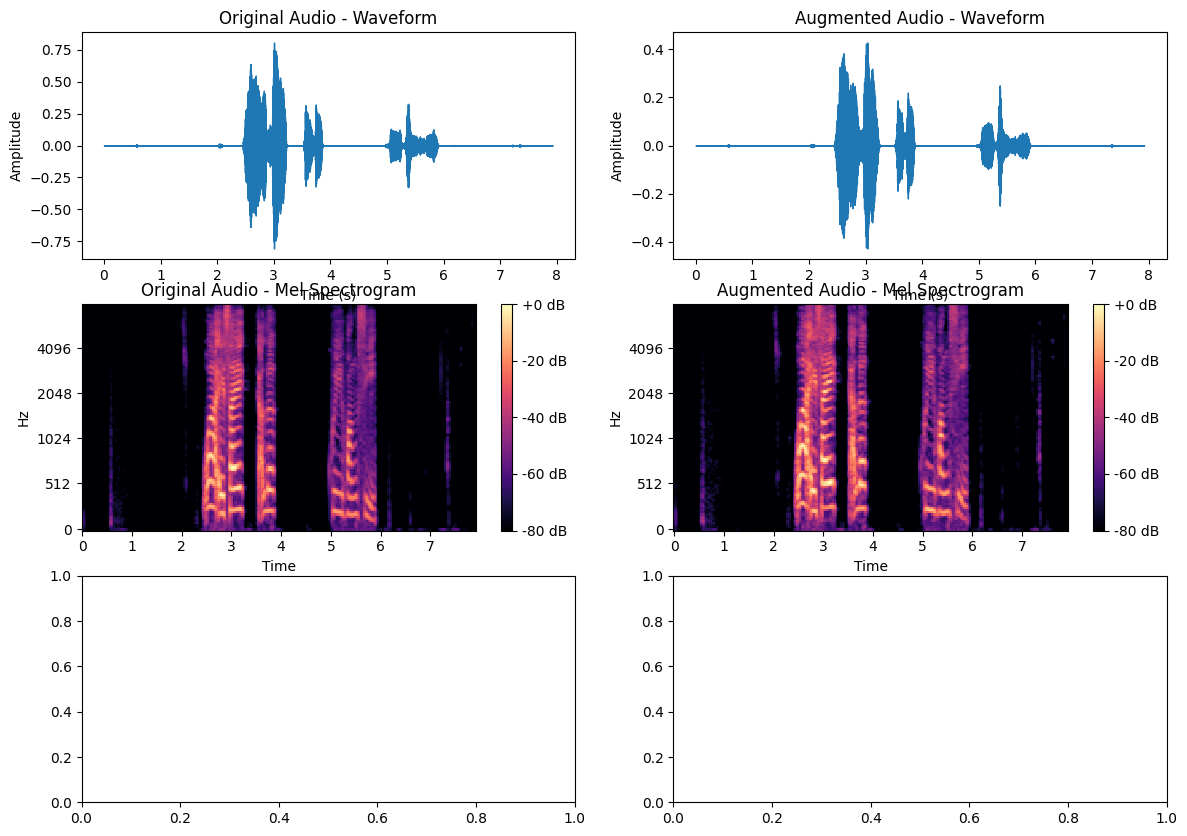

In [ ]:
visualize_audio_comparison("/content/recordings_Alex_audio23.wav", "/content/recordings_Alex_audio23_pitchup_1.wav")